In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics as stat
from scipy import stats
import scipy

In [2]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 72E3-1983

 Directory of C:\Users\kulde\ExcelR\Assignment Practice\Simple Linear Regression

09-11-2022  17:17    <DIR>          .
03-11-2022  12:17    <DIR>          ..
07-11-2022  09:21    <DIR>          .ipynb_checkpoints
04-11-2022  18:05               218 delivery_time.csv
07-11-2022  10:34           116,262 Delivery_time.ipynb
04-11-2022  18:05               318 Problem_statements.txt
04-11-2022  18:05               454 Salary_Data.csv
09-11-2022  17:17            56,897 Salary_Data.ipynb
               5 File(s)        174,149 bytes
               3 Dir(s)  356,946,997,248 bytes free


In [6]:
Salary_Data=pd.read_csv("Salary_Data.csv")
Salary_Data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


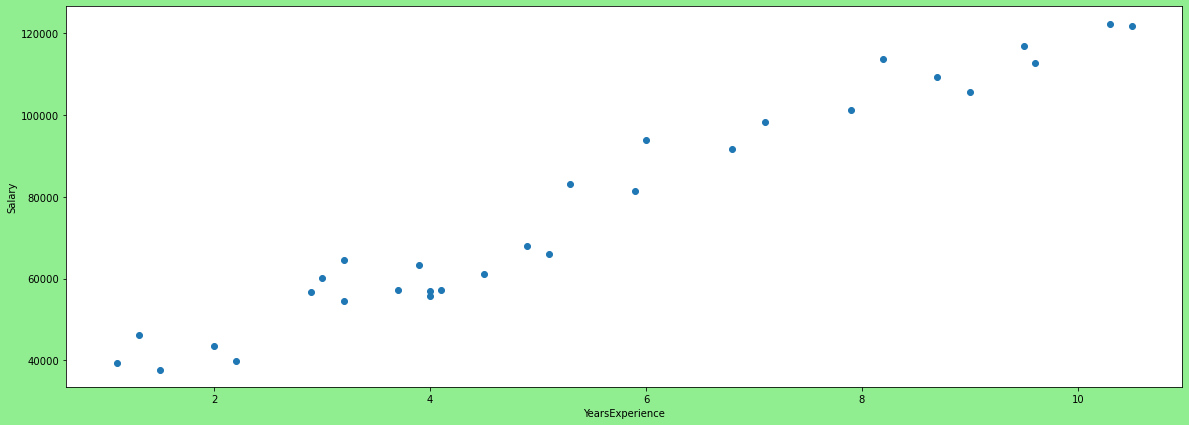

In [7]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(Salary_Data["YearsExperience"],Salary_Data["Salary"])
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [8]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
lm = LinearRegression()
lm

LinearRegression()

In [11]:
X = Salary_Data["YearsExperience"].values.reshape(-1,1)
Y = Salary_Data["Salary"].values.reshape(-1,1)

lm.fit(X,Y)


LinearRegression()

In [12]:
print (lm.coef_)#alpha 
print (lm.intercept_)#beta

[[9449.96232146]]
[25792.20019867]


In [13]:
lm.predict(X)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [14]:
lm.predict(X)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

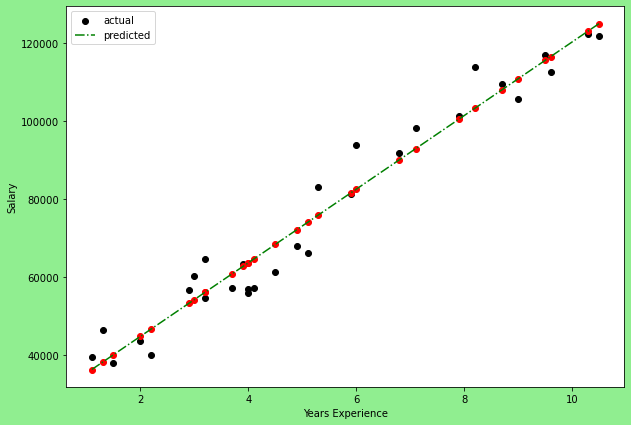

In [15]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(Salary_Data["YearsExperience"],(Salary_Data["Salary"]),color="black",label="actual");
plt.plot(Salary_Data["YearsExperience"],lm.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(Salary_Data["YearsExperience"],lm.predict(X),color="red")
plt.xlabel("Years Experience");
plt.ylabel("Salary")

plt.legend(loc="best")
plt.show()

In [16]:
pred_train_lm =lm.predict(X)
r2_score(Salary_Data["Salary"],pred_train_lm)


0.9569566641435086

In [17]:
first_model = smf.ols("Salary~YearsExperience",data=Salary_Data).fit()

In [18]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        17:17:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""